In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
model = VGG16(include_top=False, #  
                 weights="imagenet")

In [12]:
model.trainable = False
model = Sequential([model,
                    GlobalAveragePooling2D(),
                    Dense(4, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', # 변경 다중
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
import os

# 기본 경로
base_dir = '/Users/hye/Desktop/HS/mok/2022/2학기/2.인공지능응용시스템/프로젝트/test2'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

In [15]:
BATCH_SIZE = 32
image_height = 160
image_width = 160

In [16]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")


Found 1277 images belonging to 4 classes.


In [17]:
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width), 
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

Found 452 images belonging to 4 classes.


In [18]:
history=model.fit(train_generator,
          epochs=30,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/30


2022-12-12 17:01:55.890791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-12 17:02:08.458790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 - 17s - loss: 1.0966 - accuracy: 0.5709 - val_loss: 0.8553 - val_accuracy: 0.7102 - 17s/epoch - 435ms/step
Epoch 2/30
40/40 - 16s - loss: 0.7556 - accuracy: 0.7478 - val_loss: 0.6714 - val_accuracy: 0.7279 - 16s/epoch - 409ms/step
Epoch 3/30
40/40 - 18s - loss: 0.6052 - accuracy: 0.7674 - val_loss: 0.5689 - val_accuracy: 0.7566 - 18s/epoch - 462ms/step
Epoch 4/30
40/40 - 18s - loss: 0.5219 - accuracy: 0.8074 - val_loss: 0.5055 - val_accuracy: 0.8031 - 18s/epoch - 451ms/step
Epoch 5/30
40/40 - 19s - loss: 0.4618 - accuracy: 0.8371 - val_loss: 0.4611 - val_accuracy: 0.8628 - 19s/epoch - 463ms/step
Epoch 6/30
40/40 - 19s - loss: 0.4259 - accuracy: 0.8575 - val_loss: 0.4314 - val_accuracy: 0.8673 - 19s/epoch - 477ms/step
Epoch 7/30
40/40 - 19s - loss: 0.3942 - accuracy: 0.8888 - val_loss: 0.4134 - val_accuracy: 0.8673 - 19s/epoch - 484ms/step
Epoch 8/30
40/40 - 20s - loss: 0.3762 - accuracy: 0.8904 - val_loss: 0.3911 - val_accuracy: 0.8783 - 20s/epoch - 512ms/step
Epoch 9/30
40/40 - 

Text(0.5, 1.0, 'loss')

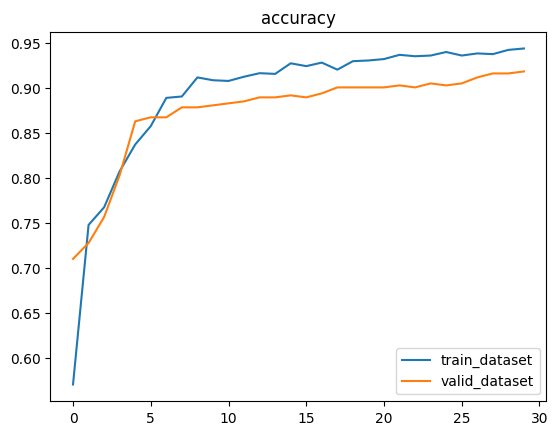

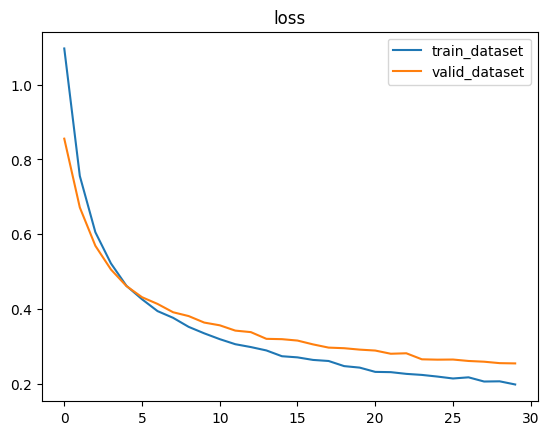

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="train_dataset")
plt.plot(epochs, val_accuracy, label="valid_dataset")
plt.legend()
plt.title('accuracy')
plt.figure()


plt.plot(epochs, loss, label="train_dataset")
plt.plot(epochs, val_loss, label="valid_dataset")
plt.legend()
plt.title('loss')


## 에폭 50으로 돌렸을 때
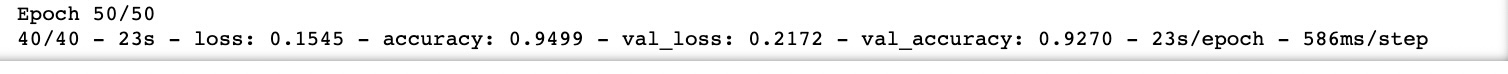
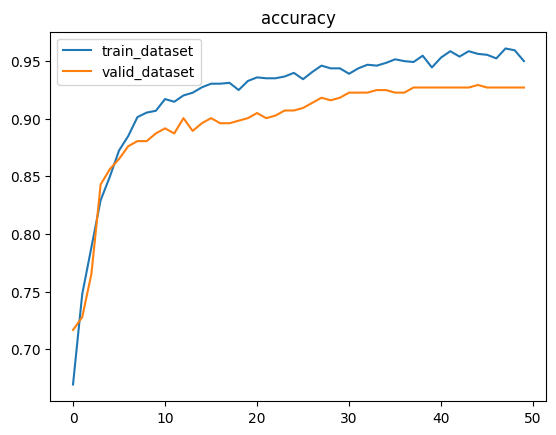
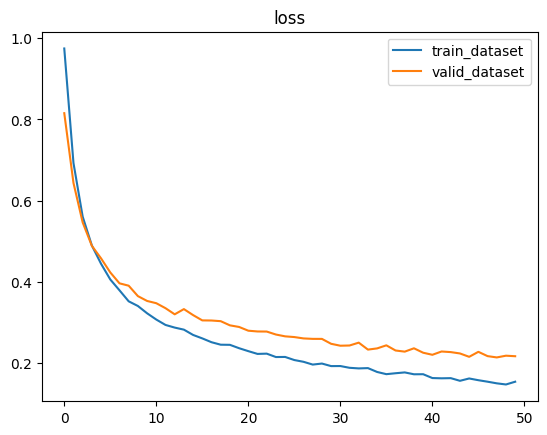

1/1 [==============================] - 0s 127ms/step


2022-12-12 17:12:23.536217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


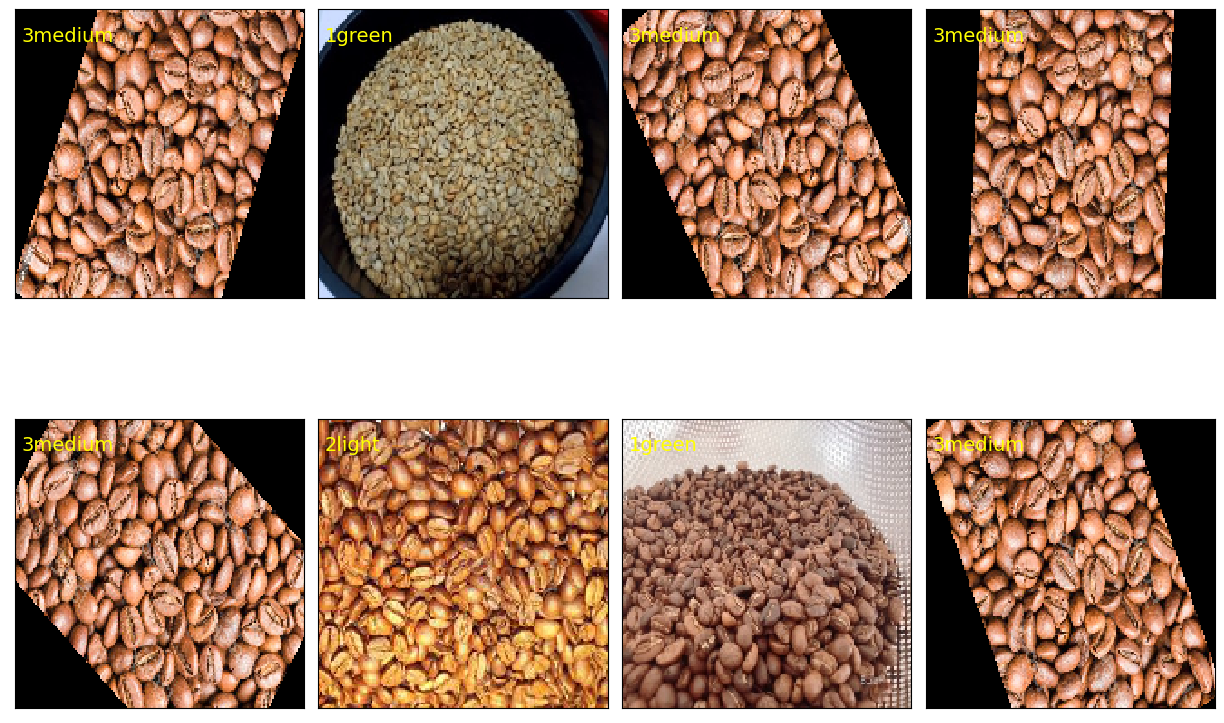

In [20]:
class_names = ['1green', '2light', '3medium', '4dark']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)


In [22]:
# 7. 모델 저장하기
from tensorflow.python.keras.models import load_model
model.save('model_vgg16_2.h5')

In [26]:
loss, acc = model.evaluate_generator(train_generator, steps=10, verbose=1)
print('loss: ', loss, 'accuracy: ', acc) # loss:  0.4534463981787364 accuracy:  0.8333333

/var/folders/kr/13b5rffx469g87nlgp_r232m0000gn/T/ipykernel_2170/3560373932.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(train_generator, steps=10, verbose=1)


10/10 [==============================] - 3s 273ms/step - loss: 0.2502 - accuracy: 0.9281
loss:  0.25017738342285156 accuracy:  0.9281250238418579
